In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
energy =pd.read_csv('eco2mix-regional-cons-def.csv', sep=';')
energy.head(1)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# conversion du champ 'Date' en format date afin de récupérer l'année, le mois et le jour dans une nouvelle colonne
# Ceci dans le but de vérifier la validité des données.

energy['Date']=pd.to_datetime(energy['Date'])

In [4]:
energy['An']=energy['Date'].dt.year
energy['Mois']=energy['Date'].dt.month
energy['Jour']=energy['Date'].dt.day

In [5]:
# Nombre d'enregistrements pour chaque année du dataset

energy[['Code INSEE région', 'An']].groupby('An').count()

,Code INSEE région
An,
2013,210240
2014,210240
2015,210240
2016,210816
2017,210240
2018,210240
2019,210240
2020,210816
2021,175104


In [6]:
energy.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26,An,Mois,Jour
count,1.858176e+06,1.858164e+06,1.858164e+06,1.083929e+06,1.858068e+06,1.858164e+06,1.858164e+06,1.048889e+06,1.858164e+06,1.858164e+06,...,385920.000000,385920.000000,385920.000000,385920.000000,385920.000000,385920.000000,0.0,1.858176e+06,1.858176e+06,1.858176e+06
mean,4.991667e+01,4.470366e+03,3.673065e+02,6.280969e+03,2.471506e+02,8.914743e+01,6.032538e+02,-1.155661e+02,8.239493e+01,-5.177867e+02,...,3.261224,14.307183,11.630276,28.159084,2.300135,54.766159,NaN,2.016925e+03,6.429014e+00,1.572815e+01
std,2.564001e+01,2.160692e+03,5.329596e+02,3.029258e+03,4.142363e+02,2.169327e+02,1.034297e+03,3.119765e+02,4.461180e+01,4.357817e+03,...,6.954096,21.050023,16.950954,24.973577,0.851754,12.867471,NaN,2.546277e+00,3.410910e+00,8.799529e+00
min,1.100000e+01,8.950000e+02,-8.300000e+01,-1.440000e+02,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2.570000e+03,4.000000e+00,-1.221900e+04,...,0.000000,0.000000,0.000000,0.000000,0.570000,7.950000,NaN,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.775000e+01,2.767000e+03,2.300000e+01,3.633000e+03,2.600000e+01,0.000000e+00,4.000000e+00,-1.600000e+01,4.700000e+01,-4.298000e+03,...,0.000000,0.000000,0.120000,12.400000,1.710000,47.020000,NaN,2.015000e+03,3.000000e+00,8.000000e+00
50%,4.800000e+01,4.091000e+03,1.470000e+02,6.265000e+03,1.020000e+02,0.000000e+00,5.700000e+01,0.000000e+00,7.300000e+01,4.870000e+02,...,0.050000,0.410000,2.160000,26.520000,2.120000,55.790000,NaN,2.017000e+03,6.000000e+00,1.600000e+01
75%,7.525000e+01,5.704000e+03,4.640000e+02,8.759000e+03,2.900000e+02,6.500000e+01,8.880000e+02,0.000000e+00,1.150000e+02,2.218000e+03,...,3.080000,24.690000,18.200000,42.900000,2.700000,64.860000,NaN,2.019000e+03,9.000000e+00,2.300000e+01
max,9.300000e+01,1.533800e+04,4.293000e+03,1.363200e+04,4.610000e+03,2.458000e+03,8.742000e+03,0.000000e+00,5.480000e+02,1.395900e+04,...,59.470000,112.430000,115.960000,2550.000000,9.690000,243.560000,NaN,2.021000e+03,1.200000e+01,3.100000e+01


In [7]:
energy.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          774247
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            809287
Bioénergies (MW)            12
Ech. physiques (MW)         12
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1633056
TCH Nucléaire (%)      1633056
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1472256
TCH Hydraulique (%)    1472256
TCO Bioénergies (%)    1472256
TCH Bioénergies (%)    1472256
Column 26              1858176
An                           0
Mois                         0
Jour                         0
dtype: int64

###### Analyse des NaN
Le dataset contient 1 629 504 lignes.
**La colonne 'Column 26' ne contient que des NaN et peut donc être supprimée**.

Les colonnes relatives aux **TCO et TCH contiennent des NAN pour 90 à 94% des enregistrements**.

In [8]:
# Proposition de scinder le dataset en 2 avec d'une part les données sans NaN
# et d'autre part les données avec des NaN
# L'objectif est de voir comment les NaN sont distribuées sur le dataset,
# notamment comment elles sont ventilées sur les années

energy.columns

Index(['Code INSEE région', 'Région', 'Nature', 'Date', 'Heure',
       'Date - Heure', 'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
       'TCO Bioénergies (%)', 'TCH Bioénergies (%)', 'Column 26', 'An', 'Mois',
       'Jour'],
      dtype='object')

In [9]:
energy_part1=energy[['Code INSEE région', 'Région', 'Nature', 'Date', 'Heure',
       'Date - Heure', 'An', 'Mois', 'Jour']]

In [10]:
energy_part2 = energy[['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
       'TCO Bioénergies (%)', 'TCH Bioénergies (%)', 'Column 26']].isna()

In [11]:
energy_concat=pd.concat([energy_part1, energy_part2], axis=1)

In [12]:
energy_concat.head(1)

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,An,Mois,Jour,Consommation (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,2013,1,1,True,...,True,True,True,True,True,True,True,True,True,True


In [13]:
energy_concat.groupby('An').sum()

,Code INSEE région,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
An,,,,,,,,,,,,,,,,,,,,,
2013,10494480,1372032,3305088,12.0,12.0,87607.0,108.0,12.0,12.0,105126.0,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0
2014,10494480,1372032,3305088,0.0,0.0,87600.0,0.0,0.0,0.0,105120.0,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0
2015,10494480,1372032,3305088,0.0,0.0,87600.0,0.0,0.0,0.0,87601.0,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0
2016,10523232,1373184,3321792,0.0,0.0,87840.0,0.0,0.0,0.0,87840.0,...,210816.0,210816.0,210816.0,210816.0,210816.0,210816.0,210816.0,210816.0,210816.0,210816.0
2017,10494480,1372032,3305088,0.0,0.0,87600.0,0.0,0.0,0.0,87600.0,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0
2018,10494480,1372032,3305088,0.0,0.0,87600.0,0.0,0.0,0.0,87600.0,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0
2019,10494480,1372032,3305088,0.0,0.0,87600.0,0.0,0.0,0.0,87600.0,...,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0,210240.0
2020,10523232,1373184,3321792,0.0,0.0,87840.0,0.0,0.0,0.0,87840.0,...,87840.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210816.0
2021,8740608,967680,2751552,0.0,0.0,72960.0,0.0,0.0,0.0,72960.0,...,72960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175104.0


On remarque que les colones TCO et TCH ne sont définies qu'à partir de courant 2020.
**On peut donc supprimer ces colonnes car la corrélation avec les autres colonnes ne sera pertinente**.

De plus, l'objectif du projet étant de définir le phasage entre consommation et production et de
proposer une prévision de consommation, TCO (taux de couverture des besoins par la filière énergie concernée)
et TCH (taux de charge de la capacité disponible par filière d'énergie) ne semblent pas être des
éléments déterminants de l'étude.

Un autre élément notable concerne l'année 2013. Il conviendra de vérifier s'il n'y a pas 12 enregistrements
ne contenant que des NaN et donc pouvant être supprimés.

In [14]:
energy=energy[['Code INSEE région', 'Région', 'Nature', 'An', 'Mois', 'Jour', 'Date', 'Heure',
       'Date - Heure', 'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)']]
energy.head(1)

,Code INSEE région,Région,Nature,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,27,Bourgogne-Franche-Comté,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
energy[energy[['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)']].isna().sum(axis=1)==9]

,Code INSEE région,Région,Nature,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,27,Bourgogne-Franche-Comté,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,Occitanie,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Centre-Val de Loire,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52,Pays de la Loire,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,53,Bretagne,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,44,Grand Est,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,75,Nouvelle-Aquitaine,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11,Île-de-France,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,93,Provence-Alpes-Côte d'Azur,Données définitives,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Confirmation que nous avons 12 enregistrements avec des NaN sur l'ensemble des variables concernant les données
d'énergie dans le dataset. **Il s'agit des 12 premiers enregistrements que l'on peut supprimer**.

In [16]:
energy=energy.iloc[12:]
energy.head()

,Code INSEE région,Région,Nature,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
12,75,Nouvelle-Aquitaine,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,5464.0,240.0,4993.0,175.0,0.0,427.0,NaN,142.0,-518.0
13,52,Pays de la Loire,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,3595.0,127.0,NaN,182.0,0.0,0.0,NaN,32.0,3252.0
14,11,Île-de-France,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,9134.0,685.0,NaN,16.0,0.0,0.0,NaN,142.0,8289.0
15,27,Bourgogne-Franche-Comté,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,2357.0,236.0,NaN,106.0,0.0,105.0,0.0,12.0,1894.0
16,44,Grand Est,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,4943.0,319.0,9137.0,1109.0,0.0,1418.0,0.0,57.0,-7102.0


In [17]:
energy.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
An                          0
Mois                        0
Jour                        0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)         774235
Eolien (MW)                96
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)           809275
Bioénergies (MW)            0
Ech. physiques (MW)         0
dtype: int64

In [18]:
# Il est probable que les NaN pour la production d'énergie nucléaire, éolienne et de pompage,
# s'explique par l'absence de capacité dans certaines régions.
# Je propose d'identifier dans un premier temps les régions qui seraient concernées.

energy[energy['Nucléaire (MW)'].isna()==True].groupby('Région').sum()

,Code INSEE région,An,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Région,,,,,,,,,,,,,
Bourgogne-Franche-Comté,4180869,312314787,995519,2435471,3.756287e+08,12771353.0,0.0,19543640.0,4908877.0,14841644.0,-469142.0,4095849.0,3.198937e+08
Bretagne,8206891,312314787,995519,2435471,3.929159e+08,11315474.0,0.0,29996278.0,3841691.0,10226757.0,-1036817.0,6062949.0,3.324768e+08
Pays de la Loire,8052044,312314787,995519,2435471,4.757844e+08,77968033.0,0.0,27239190.0,9126876.0,316263.0,0.0,6749071.0,3.543993e+08
Provence-Alpes-Côte d'Azur,14400771,312314787,995519,2435471,7.208825e+08,115152233.0,0.0,2024163.0,26754390.0,175120964.0,-726915.0,14245476.0,3.882832e+08
Île-de-France,1703317,312314787,995519,2435471,1.243416e+09,39085799.0,0.0,2113026.0,1609731.0,891834.0,0.0,21038749.0,1.178670e+09


Une rechercher sur Internet :
https://www.edf.fr/groupe-edf/espaces-dedies/l-energie-de-a-a-z/tout-sur-l-energie/produire-de-l-electricite/le-nucleaire-en-chiffres
confirme que les régions identifiées ci-dessus n'ont pas de production d'énergie nucléaire.
**On pourra donc remplacer ces NaN par la valeur 0 et conserver les lignes correspondantes**.

In [19]:
# Itération pour la source d'énergie de pompage
# Petite recherche sur Internet pour comprendre de quoi il s'agit :
# Energie produite en circuit fermée entre 2 barrages.
# Le transfert du bassin supérieur vers le bassin inférieur produit de l'énergie.
# L'eau est ensuite pompée du bassin inférieur vers le bassin supérieur.

energy[energy['Pompage (MW)'].isna()==False].groupby('Région').sum()

,Code INSEE région,An,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Région,,,,,,,,,,,,,
Auvergne-Rhône-Alpes,13007148,312314787,995519,2435471,1.160508e+09,34805886.0,1.466156e+09,17191052.0,17310301.0,499669245.0,-68068239.0,16176393.0,-822780741.0
Bourgogne-Franche-Comté,4180869,312314787,995519,2435471,3.756287e+08,12771353.0,0.000000e+00,19543640.0,4908877.0,14841644.0,-469142.0,4095849.0,319893668.0
Bretagne,8206891,312314787,995519,2435471,3.929159e+08,11315474.0,0.000000e+00,29996278.0,3841691.0,10226757.0,-1036817.0,6062949.0,332476838.0
Grand Est,6813268,312314787,995519,2435471,8.017344e+08,156865630.0,1.356512e+09,104367401.0,11551508.0,147751373.0,-16897693.0,14292058.0,-972783256.0
Hauts-de-France,3833824,241761745,766847,1884623,6.837323e+08,120356470.0,4.489630e+08,103302896.0,2294934.0,177751.0,0.0,13793831.0,-5161559.0
Occitanie,11768372,312314787,995519,2435471,6.582254e+08,4956833.0,3.059489e+08,51748633.0,36036816.0,202632369.0,-34017175.0,12585419.0,78353785.0
Provence-Alpes-Côte d'Azur,14400771,312314787,995519,2435471,7.208825e+08,115152233.0,0.000000e+00,2024163.0,26754390.0,175120964.0,-726915.0,14245476.0,388283222.0


Sur https://www.france-hydro-electricite.fr/lhydroelectricite-en-france/chiffres-clefs/ on apprend que les régions
**Centre Val de Loire**, **Hauts de France**, **Normandie**, **Pays de Loire** et **Ile de France** que l'on retrouve
ci-dessus ont des productions hydrauliques **non significatives**.

Il y a un écart avec la région **Nouvelle Aquitaine** qui a une production hydraulique significative mais pas données
pour le pompage. Il n'y a pas de STEP dans cette région, simplement un projet dans le Limousin à Redenat, amorcé en 1982
mais non installé.

Il y a 6 STEP en France en région **AURA**, **Occitanie** et **Grand Est**.

Je n'ai pas trouvé de ressources sur Internet permettant d'interpréter ce qui différencie la **Nouvelle Aquitaine** des autres
régions ne disposant pas de STEP (**Bretagne**, **PACA**, **Bourgogne**). Peut-on imaginer que cette région ne dispose pas du relief, ni du niveau de précipitation suffisant pour justifier la construction de stations de pompage ?

Quoi qu'il en soit, **il est cohérent d'appliquer une valeur nulle au NaN de cette colonne**.

Il convient également de rappeler que cette colonne correspond à une **consommation**.

Cette colonne étant une consommation, elle doit être aggrée à la colonne 'Consommation (MW)'. On pourrait la supprimer. Cependant, il peut être pertinent de la conserver pour la suite. Elle pourra servir, soit à calculer une performance hydraulique, soit à modifier les données pour ne pas prendre en compte l'effet de pompage.

In [20]:
# Analyse des NaN concernant la production d'énergie éolienne

energy[energy['Eolien (MW)'].isna()==True].groupby(['Région', 'An']).sum()

,,Code INSEE région,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Région,An,,,,,,,,,,,,
Centre-Val de Loire,2013,1152,576,1297,121952.0,3698.0,437862.0,0.0,152.0,679.0,0.0,1776.0,-354109.0
Île-de-France,2013,528,240,385,299908.0,54.0,0.0,0.0,356.0,0.0,0.0,5681.0,293465.0


Quelques recherches sur Internet révèlent que l'**Ile de France** ne dispose que de 11 éoliennes. La production
d'électricité éolienne y a commencé en 2012. **On peut raisonnablement considérer que la mise à 0 des valeurs NaN
pour cette région ne sera pas impactant pour la suite**.

C'est plus impactant pour la région **Centre Val de Loire**. Il convient d'analyser plus en détail ces NaN

In [21]:
centre_vdl = energy[(energy['Région']=='Centre-Val de Loire')&(energy['An']==2013)]

In [22]:
centre_vdl.isna().sum()

Code INSEE région          0
Région                     0
Nature                     0
An                         0
Mois                       0
Jour                       0
Date                       0
Heure                      0
Date - Heure               0
Consommation (MW)          0
Thermique (MW)             0
Nucléaire (MW)             0
Eolien (MW)               48
Solaire (MW)               0
Hydraulique (MW)           0
Pompage (MW)           17519
Bioénergies (MW)           0
Ech. physiques (MW)        0
dtype: int64

In [23]:
centre_vdl['Mois']=centre_vdl['Date'].dt.month

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
centre_vdl[centre_vdl['Eolien (MW)'].isna()==True].groupby('Mois').sum()

,Code INSEE région,An,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Mois,,,,,,,,,,,,
12,1152,96624,1297,121952.0,3698.0,437862.0,0.0,152.0,679.0,0.0,1776.0,-354109.0


In [25]:
centre_vdl['Jour']=centre_vdl['Date'].dt.day

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
centre_vdl[centre_vdl['Eolien (MW)'].isna()==True].groupby('Jour').sum()

,Code INSEE région,An,Mois,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Jour,,,,,,,,,,,,
27,1128,94611,564,119560.0,3621.0,428437.0,0.0,152.0,673.0,0.0,1739.0,-346360.0
28,24,2013,12,2392.0,77.0,9425.0,0.0,0.0,6.0,0.0,37.0,-7749.0


In [27]:
centre_vdl[centre_vdl['Eolien (MW)'].isna()==True].groupby(['Jour', 'Heure']).sum()

Code INSEE région    An  Mois  Consommation (MW)  Thermique (MW)  \
Jour Heure                                                                     
27   00:30                 24  2013    12             2597.0            78.0   
     01:00                 24  2013    12             2481.0            78.0   
     01:30                 24  2013    12             2601.0            78.0   
     02:00                 24  2013    12             2546.0            78.0   
     02:30                 24  2013    12             2498.0            78.0   
     03:00                 24  2013    12             2400.0            78.0   
     03:30                 24  2013    12             2257.0            77.0   
     04:00                 24  2013    12             2305.0            74.0   
     04:30                 24  2013    12             2243.0            74.0   
     05:00                 24  2013    12             2280.0            73.0   
     05:30                 24  2013    12             2345.0            78.0   
     06:00                 24  2013    12             2415.0            78.0   
     06:30                 24  2013    12             2433.0            78.0   
     07:00                 24  2013    12             2530.0            77.0   
     07:30                 24  2013    12             2661.0            76.0   
     08:00                 24  2013    12             2646.0            77.0   
     08:30                 24  2013    12             2728.0            77.0   
     09:00                 24  2013    12             2655.0            78.0   
     09:30                 24  2013    12             2663.0            77.0   
     10:00                 24  2013    12             2751.0            77.0   
     10:30                 24  2013    12             2731.0            77.0   
     11:00                 24  2013    12             2773.0            77.0   
     11:30                 24  2013    12             2784.0            77.0   
     12:00                 24  2013    12             2758.0            77.0   
     12:30                 24  2013    12             2742.0            77.0   
     13:00                 24  2013    12             2742.0            78.0   
     13:30                 24  2013    12             2610.0            78.0   
     14:00                 24  2013    12             2614.0            77.0   
     14:30                 24  2013    12             2498.0            77.0   
     15:00                 24  2013    12             2552.0            77.0   
     15:30                 24  2013    12             2492.0            77.0   
     16:00                 24  2013    12             2439.0            77.0   
     16:30                 24  2013    12             2400.0            75.0   
     17:00                 24  2013    12             2419.0            77.0   
     17:30                 24  2013    12             2517.0            77.0   
     18:00                 24  2013    12             2699.0            76.0   
     18:30                 24  2013    12             2756.0            78.0   
     19:00                 24  2013    12             2806.0            78.0   
     19:30                 24  2013    12             2687.0            78.0   
     20:00                 24  2013    12             2591.0            77.0   
     20:30                 24  2013    12             2508.0            77.0   
     21:00                 24  2013    12             2487.0            77.0   
     21:30                 24  2013    12             2493.0            78.0   
     22:00                 24  2013    12             2388.0            77.0   
     22:30                 24  2013    12             2353.0            77.0   
     23:00                 24  2013    12             2383.0            77.0   
     23:30                 24  2013    12             2303.0            77.0   
28   00:00                 24  2013    12             2392.0            77.0   

           

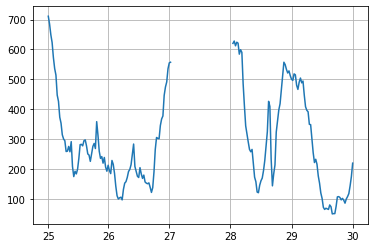

In [28]:
# Il manque les données pour la production éolienne pour la journée du 27 Décembre 2013. C'est cohérent avec
# le fait qu'il y ait 48 NaN car les enregistrements sont effectués toutes les 30 min, soit 48 données par jour.
# On peut analyser la production du 25 au 29 pour proposer des valeurs pour le 27 suivant les conditions
# météorologiques du moment.

plt.plot(range(5*48),
         energy['Eolien (MW)'][(energy['Région']=='Centre-Val de Loire')&(energy['An']==2013)&(energy['Mois']==12)&(energy['Jour']<=29)&(energy['Jour']>=25)])
plt.xticks(ticks = [0, 47, 95, 143, 191, 239], labels = [25, 26, 27, 28, 29, 30])
plt.grid();

L'énergie produite grâce au vent à la dernière heure de la journée du 26 est très proche que celle produite à la
première heure du 28. Le vent n'est pas constant dans la journée. Le début et la fin de journée ayant des valeurs élevées, une proposition est de considérer un pattern équivalent à la journée du 28, inversé.

In [29]:
# Mise en application :
# NaN Production nucléaire : 0

energy['Nucléaire (MW)'] = energy['Nucléaire (MW)'].fillna(0)

In [30]:
# NaN Production pompage : 0

energy['Pompage (MW)'] = energy['Pompage (MW)'].fillna(0)

In [31]:
# NaN Production éolienne IDF : 0

energy['Eolien (MW)'][energy['Région']=='Île-de-France'] = energy['Eolien (MW)'][energy['Région']=='Île-de-France'].fillna(0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
# Nan Production éolienne : J+1

energy = energy.sort_values(by=['Région', 'Date', 'Heure'])
energy = energy.reset_index()
index_nan = energy[(energy['Eolien (MW)'].isna()==True)&(energy['Heure']=='00:30')].index
index_nan=index_nan[0]
index_nan

481821

In [33]:
energy.head(1)

,index,Code INSEE région,Région,Nature,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,18,84,Auvergne-Rhône-Alpes,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0


In [34]:
for i in np.arange(48):
    j0 = index_nan+i
    j1 = index_nan+2*48-i
    eol = energy.iloc[j1, 13]
    energy.iloc[j0, 13] = eol

In [35]:
energy.isna().sum()

index                  0
Code INSEE région      0
Région                 0
Nature                 0
An                     0
Mois                   0
Jour                   0
Date                   0
Heure                  0
Date - Heure           0
Consommation (MW)      0
Thermique (MW)         0
Nucléaire (MW)         0
Eolien (MW)            0
Solaire (MW)           0
Hydraulique (MW)       0
Pompage (MW)           0
Bioénergies (MW)       0
Ech. physiques (MW)    0
dtype: int64

In [36]:
energy[energy['Eolien (MW)'].isna()==True]

,index,Code INSEE région,Région,Nature,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)


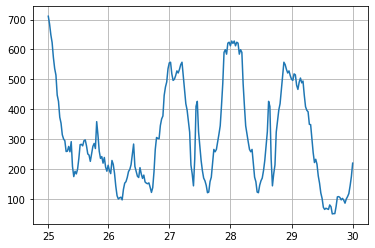

In [37]:
plt.plot(range(5*48),
         energy['Eolien (MW)'][(energy['Région']=='Centre-Val de Loire')&(energy['An']==2013)&(energy['Mois']==12)&(energy['Jour']<=29)&(energy['Jour']>=25)])
plt.xticks(ticks = [0, 47, 95, 143, 191, 239], labels = [25, 26, 27, 28, 29, 30])
plt.grid();

In [38]:
energy=energy.drop(['index'], axis=1)
energy.head(1)

,Code INSEE région,Région,Nature,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,84,Auvergne-Rhône-Alpes,Données définitives,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0


In [39]:
energy.to_csv('dataset_energie_clean_cyril.csv')